In [113]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import math
import datetime

In [114]:
air_reserve_loc = os.path.join(os.getcwd(), 'Data', 'air_reserve.csv')
air_reserve = pd.read_csv(air_reserve_loc)
hpg_reserve_loc = os.path.join(os.getcwd(), 'Data', 'hpg_reserve.csv')
hpg_reserve = pd.read_csv(hpg_reserve_loc)
store_id_relation_loc = os.path.join(os.getcwd(), 'Data', 'store_id_relation.csv')
store_id_relation = pd.read_csv(store_id_relation_loc)

In [115]:
air_reserve_merged = pd.merge(air_reserve, store_id_relation, how = 'left', left_on = 'air_store_id', right_on = 'air_store_id')
#add the hpg ids into air_reserve

In [116]:
air_reserve_merged.dropna(axis = 0, how = 'any',inplace = True)
#drop all the rows with null values

In [117]:
hpg_reserve_merged = pd.merge(hpg_reserve, store_id_relation, how = 'left', left_on = 'hpg_store_id', right_on = 'hpg_store_id')
#add the air ids into hpg_reserve

In [118]:
hpg_reserve_merged.dropna(axis = 0, how = 'any', inplace = True)
##drop all the rows with null values

In [119]:
hpg_reserve_merged_2016 = hpg_reserve_merged[hpg_reserve_merged['visit_datetime'].str.contains("2016")]
#filter the values in this specific year

In [120]:
air_reserve_merged_2016 = air_reserve_merged[air_reserve_merged['visit_datetime'].str.contains("2016")]
##filter the values in this specific year

In [121]:
air_visitor_total_2016 = air_reserve_merged_2016['reserve_visitors'].sum()
print (air_visitor_total_2016)
#value that the graph needs

79342


In [122]:
hpg_visitor_total_2016 = hpg_reserve_merged_2016['reserve_visitors'].sum()
print (hpg_visitor_total_2016)
#value that the graph needs

87381


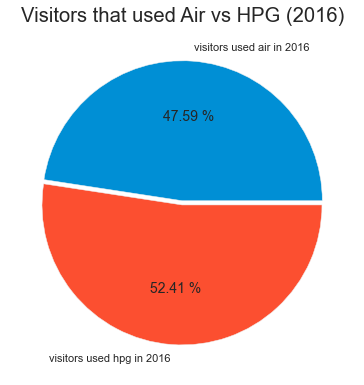

In [123]:
labels = ['visitors used air in 2016','visitors used hpg in 2016']
explode = (0.015 ,0.015)
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.pie([air_visitor_total_2016, hpg_visitor_total_2016], labels = labels, autopct = '%.2f %%', explode = explode, )
plt.title('Visitors that used Air vs HPG (2016)')
plt.show()

### We can see that HPG users are slightly more than Air users in 2016

In [124]:
air_store_info_loc = os.path.join(os.getcwd(), 'Data', 'air_store_info.csv')
air_store_info = pd.read_csv(air_store_info_loc)

In [125]:
pd.unique(air_store_info['air_genre_name'])

array(['Italian/French', 'Dining bar', 'Yakiniku/Korean food',
       'Cafe/Sweets', 'Izakaya', 'Okonomiyaki/Monja/Teppanyaki',
       'Bar/Cocktail', 'Japanese food', 'Creative cuisine', 'Other',
       'Western food', 'International cuisine', 'Asian', 'Karaoke/Party'],
      dtype=object)

In [126]:
asian = air_store_info[air_store_info['air_genre_name']=='Izakaya']
asian =asian.append(air_store_info[air_store_info['air_genre_name'] == 'Yakiniku/Korean food'])
asian =asian.append(air_store_info[air_store_info['air_genre_name'] == 'Okonomiyaki/Monja/Teppanyaki'])
asian =asian.append(air_store_info[air_store_info['air_genre_name'] == 'Japanese food'])
asian =asian.append(air_store_info[air_store_info['air_genre_name'] == 'Asian'])
asian.insert(2, 'general_genre', 'asian')
#Groups all the asian restaurants into the general genre 'asian'

In [127]:
international = air_store_info[air_store_info['air_genre_name']=='Italian/French']
international = international.append(air_store_info[air_store_info['air_genre_name'] == 'Western food'])
international = international.append(air_store_info[air_store_info['air_genre_name'] == 'International cuisine'])
international = international.append(air_store_info[air_store_info['air_genre_name'] == 'Creative cuisine'])
international.insert(2, 'general_genre', 'international') 
#Groups all the international restaurants into the general genre 'international'

In [128]:
bar_and_party = air_store_info[air_store_info['air_genre_name']=='Dining bar']
bar_and_party = bar_and_party.append(air_store_info[air_store_info['air_genre_name'] == 'Bar/Cocktail'])
bar_and_party = bar_and_party.append(air_store_info[air_store_info['air_genre_name'] == 'Karaoke/Party'])
bar_and_party.insert(2, 'general_genre', 'bar_and_party') 
#Groups all the bar and party places into the general genre 'bar_and_party'

In [129]:
cafe_sweets_and_other = air_store_info[air_store_info['air_genre_name']=='Cafe/Sweets']
cafe_sweets_and_other=  cafe_sweets_and_other.append(air_store_info[air_store_info['air_genre_name'] == 'Other'])
cafe_sweets_and_other.insert(2, 'general_genre', 'cafe_sweets_and_other') 
#Groups all the cafe, sweets and other places into the general genre 'cafe_sweets_and_other'

In [130]:
new_list = [asian, international, bar_and_party, cafe_sweets_and_other]
result = pd.concat(new_list)
#result is the concatenated dataframe that contains a general genre column.

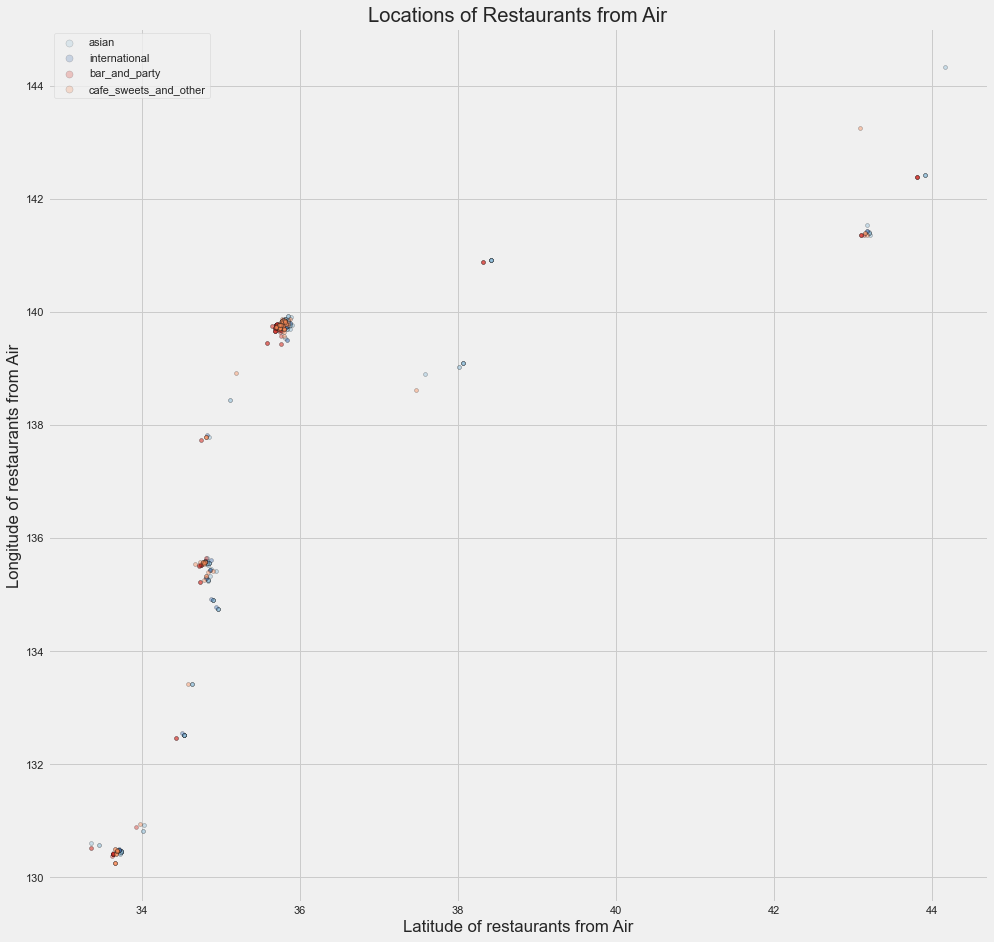

In [131]:
colours = ['#91bfdb','#4575b4','#d73027','#fc8d59']
fig, ax1 = plt.subplots(1,1, figsize = (15,15))
genres = pd.unique(result['general_genre'])
for i in range(len(genres)):
    single_general_genre = result[result['general_genre'] == genres[i]]
    scatter = ax1.scatter(x=single_general_genre['latitude']+(np.random.rand()*0.15),
                y=single_general_genre['longitude']+(np.random.rand()*0.15),
                alpha = 0.24,
               c=colours[i],edgecolors='k',
                s = 15)
plt.xlabel('Latitude of restaurants from Air')
plt.ylabel('Longitude of restaurants from Air')
plt.title('Locations of Restaurants from Air')
lgnd = plt.legend(loc="upper left", labels=genres)
for i in range(len(genres)):
    lgnd.legendHandles[i]._sizes = [50]

### There is no obvious signs of a specific genre of restaurant being particularly popular in any area. All genres are distributed rather evenly throughout Japan.

In [132]:
air_visit_data_loc = os.path.join(os.getcwd(), 'Data', 'air_visit_data.csv')
d_parser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d')
air_visit_data = pd.read_csv(air_visit_data_loc, parse_dates = ['visit_date'], date_parser = d_parser)

<ipython-input-132-65fedfa47b26>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d')


In [133]:
number_of_restaurants = pd.unique(air_visit_data['air_store_id'])
total_restaurants = len(number_of_restaurants)

In [134]:
air_visit_data.index = pd.to_datetime(air_visit_data.index, unit='m')
resampled = air_visit_data.resample('M',on='visit_date').sum()


In [135]:
jan = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-01")])
jann = jan['air_store_id'].nunique()
jann = resampled.iloc[0].visitors/jann
#average number of visitors visited a restaurant in January 2016

In [136]:
feb = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-02")])
febn = feb['air_store_id'].nunique()
febn = resampled.iloc[1].visitors/febn
#average number of visitors visited a restaurant in February 2016

In [137]:
mar = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-03")])
marn = mar['air_store_id'].nunique()
marn = resampled.iloc[2].visitors/marn
#average number of visitors visited a restaurant in March 2016

In [138]:
apr = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-04")])
aprn = apr['air_store_id'].nunique()
aprn = resampled.iloc[3].visitors/aprn
#average number of visitors visited a restaurant in April 2016

In [139]:
may = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-05")])
mayn = may['air_store_id'].nunique()
mayn = resampled.iloc[4].visitors/mayn
#average number of visitors visited a restaurant in May 2016

In [140]:
jun = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-06")])
junn = jun['air_store_id'].nunique()
junn = resampled.iloc[5].visitors/junn
#average number of visitors visited a restaurant in June 2016

In [141]:
jul = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-07")])
juln = jul['air_store_id'].nunique()
juln = resampled.iloc[6].visitors/juln
#average number of visitors visited a restaurant in July 2016

In [142]:
aug = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-08")])
augn = aug['air_store_id'].nunique()
augn = resampled.iloc[7].visitors/augn
#average number of visitors visited a restaurant in August 2016

In [143]:
sep = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-09")])
sepn = sep['air_store_id'].nunique()
sepn = resampled.iloc[8].visitors/sepn
#average number of visitors visited a restaurant in September 2016

In [144]:
oct = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-10")])
octn = oct['air_store_id'].nunique()
octn = resampled.iloc[9].visitors/octn
#average number of visitors visited a restaurant in October 2016

In [145]:
nov = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-11")])
novn = nov['air_store_id'].nunique()
novn = resampled.iloc[10].visitors/novn
#average number of visitors visited a restaurant in November 2016

In [146]:
dec = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2016-12")])
decn = dec['air_store_id'].nunique()
decn = resampled.iloc[11].visitors/decn
#average number of visitors visited a restaurant in December 2016

In [147]:
jan1 = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2017-01")])
jan1n = jan1['air_store_id'].nunique()
jan1n = resampled.iloc[12].visitors/jan1n
#average number of visitors visited a restaurant in January 2017

In [148]:
feb1 = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2017-02")])
feb1n = feb1['air_store_id'].nunique()
feb1n = resampled.iloc[13].visitors/feb1n
#average number of visitors visited a restaurant in February 2017

In [149]:
mar1 = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2017-03")])
mar1n = mar1['air_store_id'].nunique()
mar1n = resampled.iloc[14].visitors/mar1n
#average number of visitors visited a restaurant in March 2017

In [150]:
apr1 = (air_visit_data[air_visit_data['visit_date'] .astype(str).str.contains("2017-04")])
apr1n = apr1['air_store_id'].nunique()
apr1n = resampled.iloc[15].visitors/apr1n
#average number of visitors visited a restaurant in April 2017

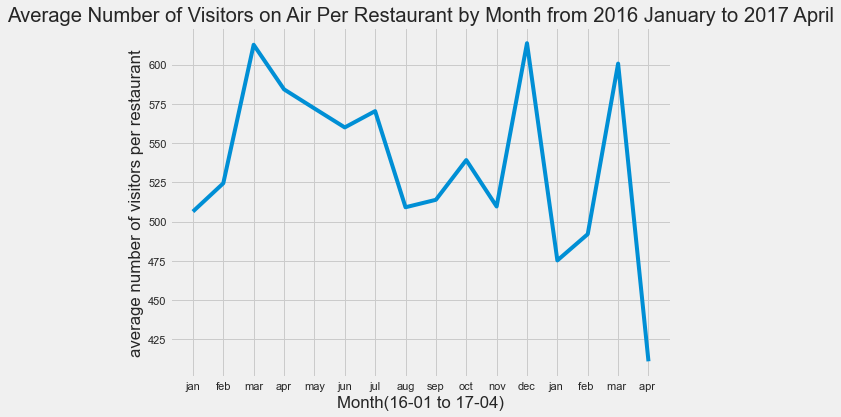

In [151]:
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.plot(['jan', 'feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec','jan ','feb ','mar ','apr '],[jann,febn,marn,aprn,mayn,junn,juln,augn,sepn,octn,novn,decn,jan1n,feb1n,mar1n,apr1n]) 
plt.xlabel('Month(16-01 to 17-04)')
plt.ylabel('average number of visitors per restaurant')
plt.title('Average Number of Visitors on Air Per Restaurant by Month from 2016 January to 2017 April')
plt.show()

This graph clearly shows three pikes which are on both March from each year and December.
An increase of number of visitors in March is a result from the much-anticipated cherry blossom season which attracts a number of foreign visitors.
Christmas and New Year are also celebrated in Japan therefore December's popularity.

In [152]:
hpg_reserve_loc = os.path.join(os.getcwd(), 'Data', 'hpg_reserve.csv')
d_parser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
hpg_reserve = pd.read_csv(hpg_reserve_loc, parse_dates = ['visit_datetime'], date_parser = d_parser)

<ipython-input-152-51c1f9ed4b69>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


In [153]:
hpg_reserve['day'] = hpg_reserve['visit_datetime'].dt.day_name()
#assign day of week to the dataframe

In [154]:
monday = len(hpg_reserve.loc[hpg_reserve.day.isin(['Monday'])])
#total number of visitors on Monday

In [155]:
tuesday = len(hpg_reserve.loc[hpg_reserve.day.isin(['Tuesday'])])
#total number of visitors on Tuesday

In [156]:
wednesday = len(hpg_reserve.loc[hpg_reserve.day.isin(['Wednesday'])])
#total number of visitors on Wednesday

In [157]:
thursday = len(hpg_reserve.loc[hpg_reserve.day.isin(['Thursday'])])
#total number of visitors on Thursday

In [158]:
friday = len(hpg_reserve.loc[hpg_reserve.day.isin(['Friday'])])
#total number of visitors on Friday

In [159]:
saturday = len(hpg_reserve.loc[hpg_reserve.day.isin(['Saturday'])])
#total number of visitors on Saturday

In [160]:
sunday = len(hpg_reserve.loc[hpg_reserve.day.isin(['Sunday'])])
#total number of visitors on Sunday

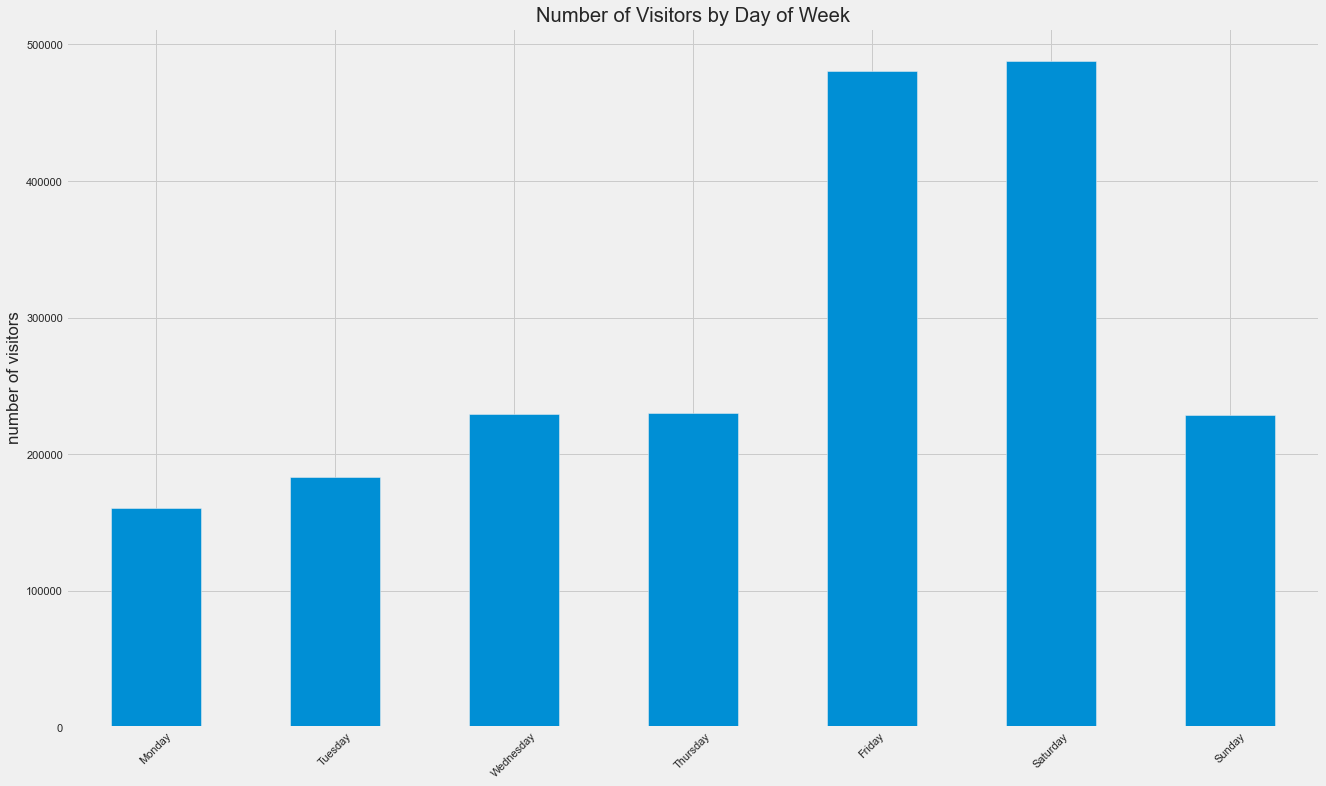

In [161]:
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hpg_reserve.day.value_counts().reindex(DAYS, fill_value=0).plot.bar(title = 'Number of Visitors by Day of Week')
plt.xticks(rotation=45)
plt.ylabel("number of visitors")
plt.show()

### This histogram shows that visitors tend to go to restaurants a lot more frequently on Friday and Saturday. This makes sense since this trend applies to all over the world where people like to spend time outside in the weekend. Monday shows the least value because this is the start of the week and is usually busy for people. The other days do not show a significant difference.

In [162]:
air_reserve_loc = os.path.join(os.getcwd(), 'Data', 'air_reserve.csv')
d_parser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
air_reserve = pd.read_csv(air_reserve_loc, parse_dates = ['visit_datetime','reserve_datetime'], date_parser = d_parser)

<ipython-input-162-378fa474ba63>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x : pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')


In [163]:
air_reserve_new = pd.merge(air_reserve, result, how = 'left', left_on = 'air_store_id', right_on = 'air_store_id')
# reuse the dataframe that is created for question 3.

In [164]:
air_reserve_new['td'] = air_reserve_new['visit_datetime']-air_reserve_new['reserve_datetime']
#compute the time difference between reserve and visit time.

In [165]:
index_list= air_reserve_new.td[(air_reserve_new.td >= "6 hours")].index.tolist()
air_reserve_new.drop(air_reserve_new.index[index_list] , inplace = True)
#drop all the outliers with a time difference longer than 6 hours.

In [166]:
air_reserve_new['newtd'] = pd.to_timedelta(air_reserve_new.td).dt.total_seconds().astype(int)
air_reserve_new['newtd'] /= 3600 # divided by 3600 so that it's in hours

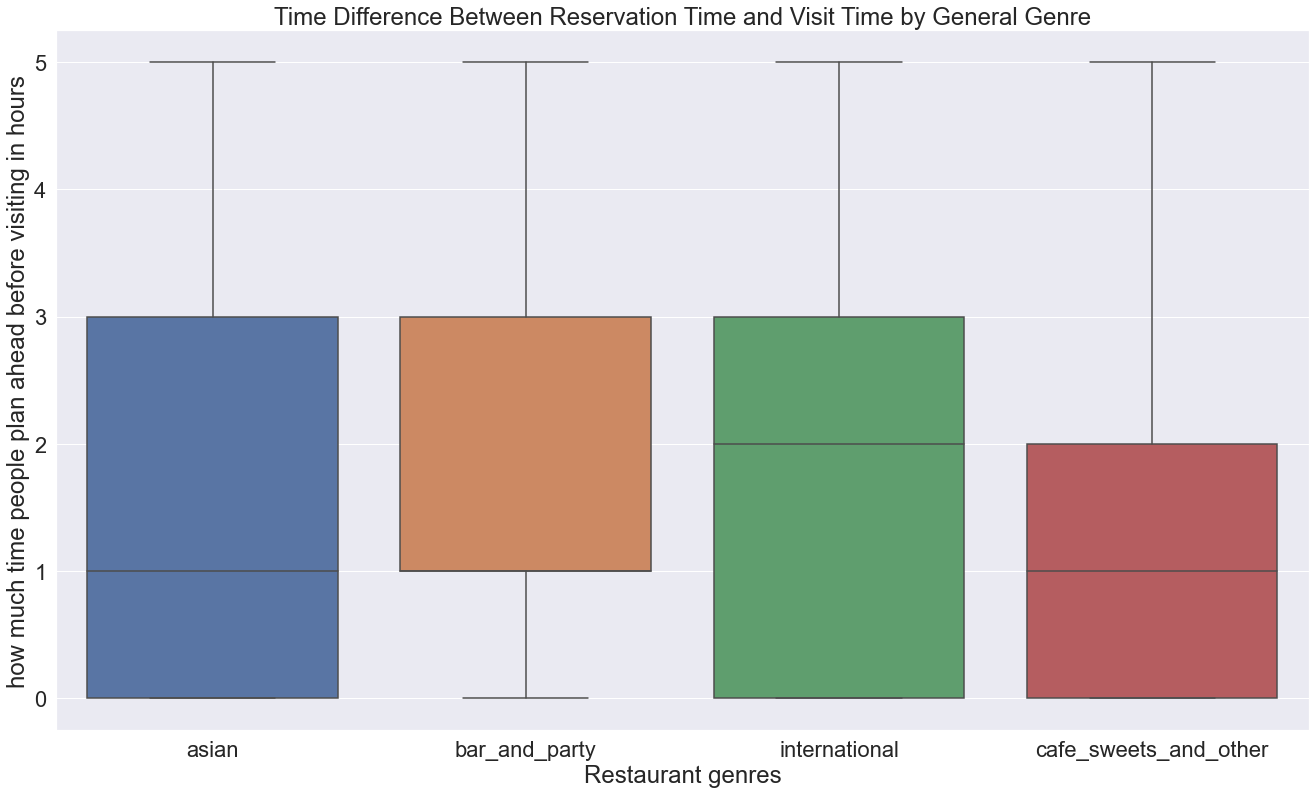

In [175]:
sns.set(rc={'figure.figsize':(20,12)})
sns.set(font_scale=2)
box_plot=sns.boxplot(x=air_reserve_new.general_genre, y = air_reserve_new.newtd)
box_plot.set(xlabel='Restaurant genres',ylabel='how much time people plan ahead before visiting in hours')
box_plot.set_title('Time Difference Between Reservation Time and Visit Time by General Genre')
plt.show()